<a href="https://colab.research.google.com/github/NikkyXO/DAS_projects/blob/main/lessons/06_Lesson_Join_(combine)_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Join (combine) Data

![Data Science Workflow](img/ds-workflow.png)

## Acquire Data
- Often we need to combine data from different sources

### pandas DataFrames
- pandas DataFrames can combine data ([pandas cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf))
- `concat([df1, df2], axis=0)`: [concat](https://pandas.pydata.org/docs/reference/api/pandas.concat.html) Concatenate pandas objects along a particular axis
- `df.join(other.set_index('key'), on='key')`: [join](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html) Join columns of another DataFrame.
- `df1.merge(df2, how='inner', on='a')` [merge](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) Merge DataFrame or named Series objects with a database-style join

In [3]:
import pandas as pd
from google.colab import files

uploaded = files.upload()

Saving Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_3158886.csv to Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_3158886.csv


In [4]:
data = pd.read_csv("API_SP.POP.TOTL_DS2_en_csv_v2_3158886.csv", skiprows=4)
meta = pd.read_csv("Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_3158886.csv")

In [5]:
data.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,NaN


In [6]:
meta.head(3)

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,South Asia,Low income,Fiscal year end: March 20; reporting period fo...,Afghanistan,NaN


In [8]:
len(meta), len(data)
meta.shape, data.shape

((265, 6), (266, 66))

In [10]:
dataset = data.merge(meta, how="inner", on="Country Code")

In [11]:
dataset.shape

(265, 71)

In [13]:
dataset.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2017,2018,2019,2020,Unnamed: 65,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,105361.0,105846.0,106310.0,106766.0,NaN,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,626392880.0,643090131.0,660046272.0,677243299.0,NaN,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN


<ipython-input-15-d8a5a702772c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataset.groupby("Region").sum()['2020'].plot.bar();


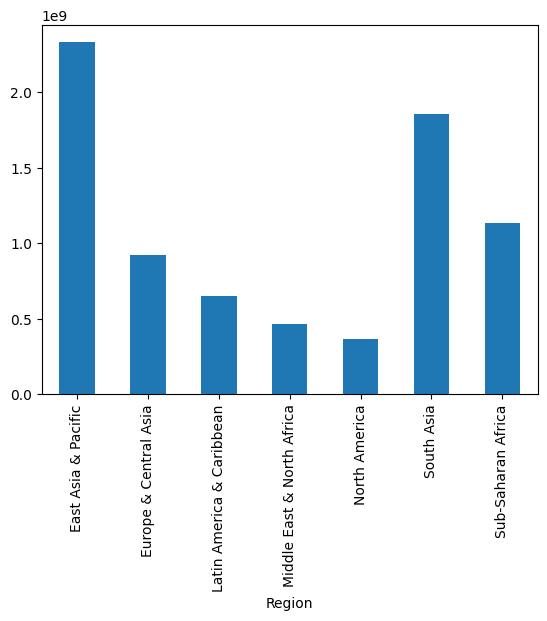

In [15]:
dataset.groupby("Region").sum()['2020'].plot.bar();